# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
Dice = np.random.randint(1,7,size = 10)
df = pd.DataFrame({'Dice':Dice})
df

,Dice
0,4
1,1
2,4
3,2
4,2
5,5
6,2
7,2
8,1
9,1


#### 2.- Plot the results sorted by value.

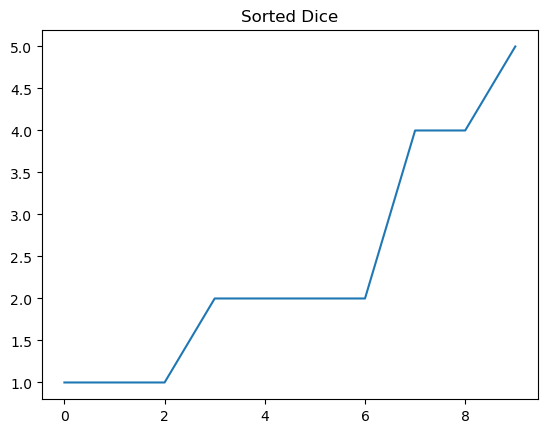

In [3]:
# your code here
Dice_values=df.sort_values(by="Dice").reset_index()['Dice']
plt.title('Sorted Dice')
plt.plot(Dice_values)


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

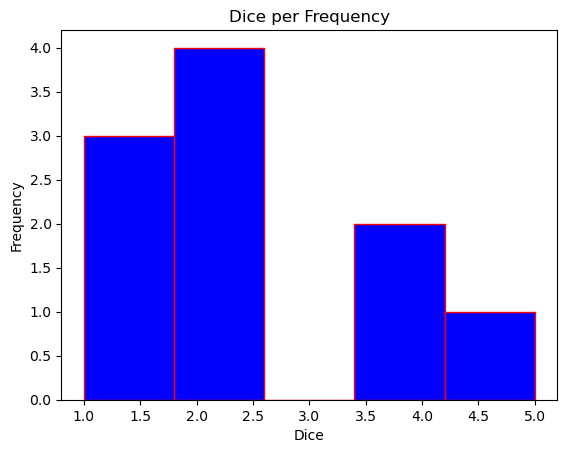

In [4]:
# your code here
plt.hist(Dice_values, bins=5, color='blue', edgecolor='red')
plt.xlabel('Dice')
plt.ylabel('Frequency')
plt.title('Dice per Frequency')
plt.show()

In [ ]:
""""
The first plot depicts the individual results of the rolling die sorted by the values whiles the second plot shows a frequency distribution of each number.
""""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [5]:
# your code here
#Calculating the mean
def average_value(x):
    return np.sum(x)/len(x)

In [6]:
average_value(Dice_values)

2.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [10]:
# your code here
frequency = {}

for element in Dice_values:
    if element in frequency:
        frequency[element] +=1
    else:
        frequency[element] = 1

frequency

{1: 3, 2: 4, 4: 2, 5: 1}

In [12]:
mean2 = sum([k*v for k,v in frequency.items()])/sum([v for k,v in frequency.items()])
mean2

2.4

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [13]:
# your code here
def median(x):
    # Step 1: Sort the data
    sorted_data = sorted(x)
    
    # Step 2: Check the number of observations
    n = len(sorted_data)
    
    if n % 2 == 1:
        # Odd number of observations
        median_index = n // 2
        median = sorted_data[median_index]
    else:
        # Even number of observations
        upper_median_index = n // 2
        lower_median_index = upper_median_index - 1
        median = (sorted_data[lower_median_index] + sorted_data[upper_median_index]) / 2

    return median

In [14]:
median(Dice_values)

2.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [15]:
def quartiles(x):
    second_quartile=np.median(x)
    
    if len(x)%2==0:
        first_quartile=median(x [:int(len(x)/2)])
        third_quartile =median(x [int(len(x)/2):])
    else:
        first_quartile=median(x [:int(len(x)/2)-1])
        third_quartile =median(x [int(len(x)/2)+1:])
        
    return first_quartile,second_quartile,third_quartile

In [16]:
quartiles(Dice_values)

(1, 2.0, 4)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [26]:
# your code here
data = pd.read_csv("roll_the_dice_hundred.csv",index_col=0)
data

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6
...,...,...
95,95,4
96,96,6
97,97,1
98,98,3


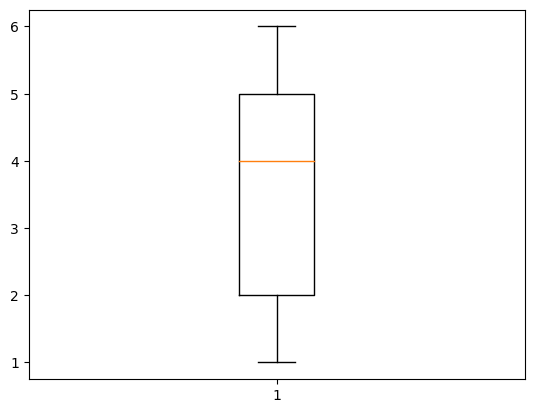

In [27]:
#Boxplot Visualition
hd_rolls = data.sort_values(by=['value'])
plt.boxplot(data['value'])
plt.show()

In [ ]:
"""
your comments here
The box plot shows that the data is negatively skewed meaning the median is much closer the third quartile.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [28]:
# your code here
print(average_value(data['value']))
print(median(data['value']))

3.74
4.0


#### 3.- Now, calculate the frequency distribution.


In [32]:
# your code here
frequency = hd_rolls['value'].value_counts()
frequency

value
6    23
4    22
2    17
3    14
1    12
5    12
Name: count, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12.,  0., 17.,  0., 14.,  0., 22.,  0., 12., 23.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

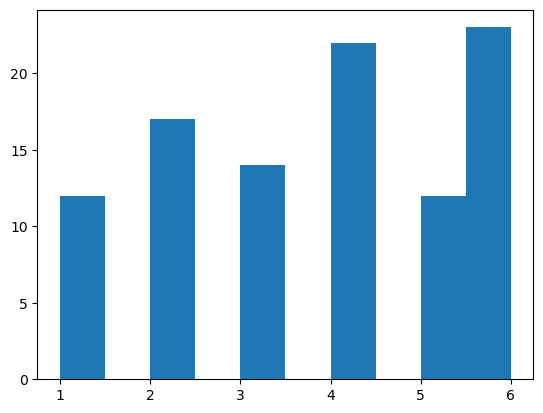

In [34]:
# your code here
plt.hist(hd_rolls['value'])

In [ ]:
"""
your comments here
The histogram doesnt give an indication of the mean value
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [35]:
# your code here
Dice_thousand=pd.read_csv("roll_the_dice_thousand.csv")
Dice_thousand

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


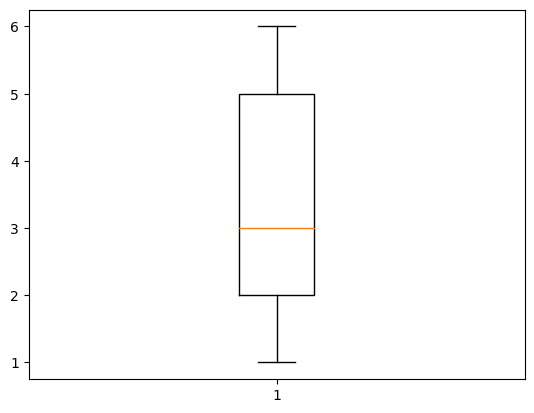

In [36]:
Th_rolls = Dice_thousand.sort_values(by=['value'])
plt.boxplot(Th_rolls['value'])
plt.show()

In [ ]:
"""
your comments here
The box plot shows that the data slighlty skewed to right meaning the median is much closer the first quartile.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [37]:
# your code here
ages1=pd.read_csv("ages_population.csv")
ages1

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


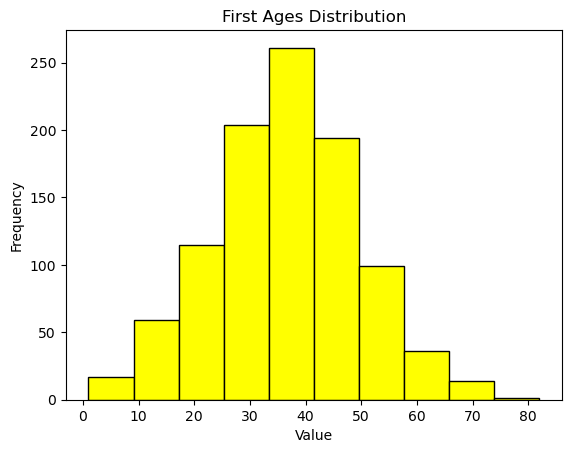

In [38]:
plt.hist(ages1)

plt.hist(ages1['observation'], color='yellow', edgecolor='black')
plt.title('First Ages Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [39]:
# your code here
print(ages1.mean())
print(np.std(ages1))

observation    36.56
dtype: float64
observation    12.81009
dtype: float64


In [ ]:
"""
your comments here
Yes , they do 
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [40]:
ages2=pd.read_csv("ages_population2.csv")
ages2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


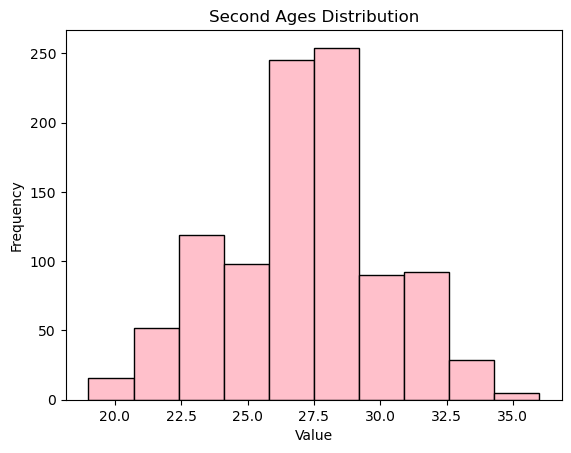

In [41]:
plt.hist(ages2)

plt.hist(ages2['observation'], color='pink', edgecolor='black')
plt.title('Second Ages Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Yes, there are differences
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [42]:
# your code here
print(ages2.mean())
print(np.std(ages2))

observation    27.155
dtype: float64
observation    2.968329
dtype: float64


In [ ]:
"""

"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [43]:
# your code here
ages3=pd.read_csv("ages_population3.csv")
ages3
#plt.hist(ages3)

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


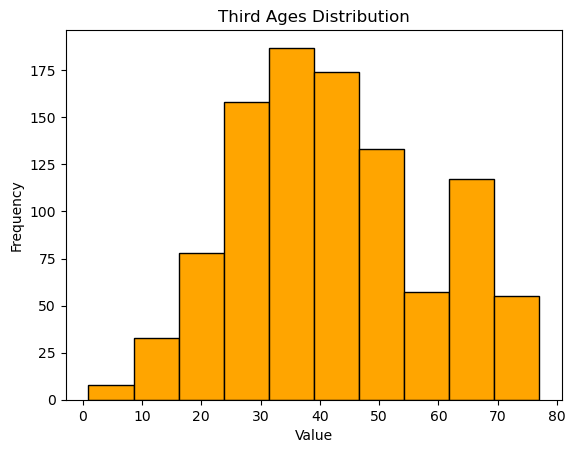

In [44]:
plt.hist(ages3)
plt.hist(ages3['observation'], color='orange', edgecolor='black')
plt.title('Third Ages Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [45]:
# your code here
print(ages3.mean())
print(np.std(ages3))

observation    41.989
dtype: float64
observation    16.136632
dtype: float64


In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [91]:
# your code here
q1 = ages3['observation'].quantile(0.25)  
q2 = ages3['observation'].quantile(0.50)  
q3 = ages3['observation'].quantile(0.75) 
q1, q2, q3

(30.0, 40.0, 53.0)

In [ ]:
"""
your comments here
"""

C:\Users\withl\AppData\Local\Temp\ipykernel_33592\965399711.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ages3[col])


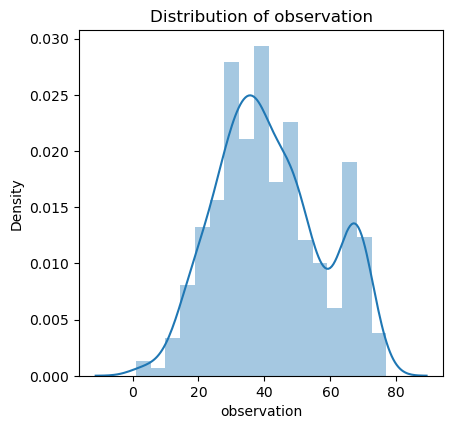

               mean  median  min   max        std  skewness
observation  41.989    40.0  1.0  77.0  16.144706  0.210389


In [47]:
# set figure size
import seaborn as sns

plt.figure(figsize=(16, 8))

# loop through columns and create distribution plot for each
for i, col in enumerate(ages3):
    plt.subplot(2, 4, i+1)
    sns.distplot(ages3[col])
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title('Distribution of ' + col)

plt.tight_layout()
plt.show()

# calculate summary statistics for each column
summary_stats = pd.DataFrame({'mean': ages3.mean(),
                              'median': ages3.median(),
                              'min': ages3.min(),
                              'max': ages3.max(),
                              'std': ages3.std(),
                              'skewness': ages3.skew()})

# display summary statistics
print(summary_stats)

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [32]:
# your code here
print(np.percentile(ages3,0))
print(np.percentile(ages3,25))
print(np.percentile(ages3,50))
print(np.percentile(ages3,85))
print(np.percentile(ages3,100))

1.0
30.0
40.0
64.0
77.0


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""